# ***Data set over view***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# ตั้งค่าที่อยู่ของไฟล์ CSV ใน Google Drive
file_path = '/content/drive/MyDrive/00.WaterQuality/water_potability.csv'

# โหลดไฟล์ CSV เป็น DataFrame
df = pd.read_csv(file_path)

# แสดงข้อมูลใน
# df.info()
print(df.info())
print('Shape of the Dataset =', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
Shape of the Dataset = (3276, 10)


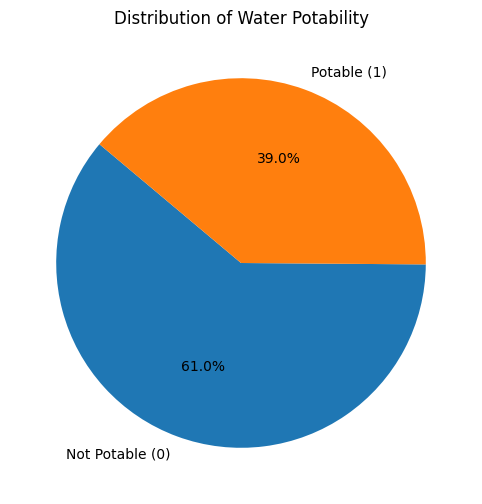

In [ ]:
import matplotlib.pyplot as plt

# สมมติว่า df เป็น DataFrame ที่เราโหลดมาแล้ว
# df = pd.read_csv(file_path)

# การนับจำนวนค่าของคอลัมน์ 'Potability'
potability_counts = df['Potability'].value_counts()

# สร้างกราฟวงกลม
plt.figure(figsize=(8, 6))
plt.pie(potability_counts, labels=['Not Potable (0)', 'Potable (1)'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Water Potability')
plt.show()


In [ ]:
#Missing Values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

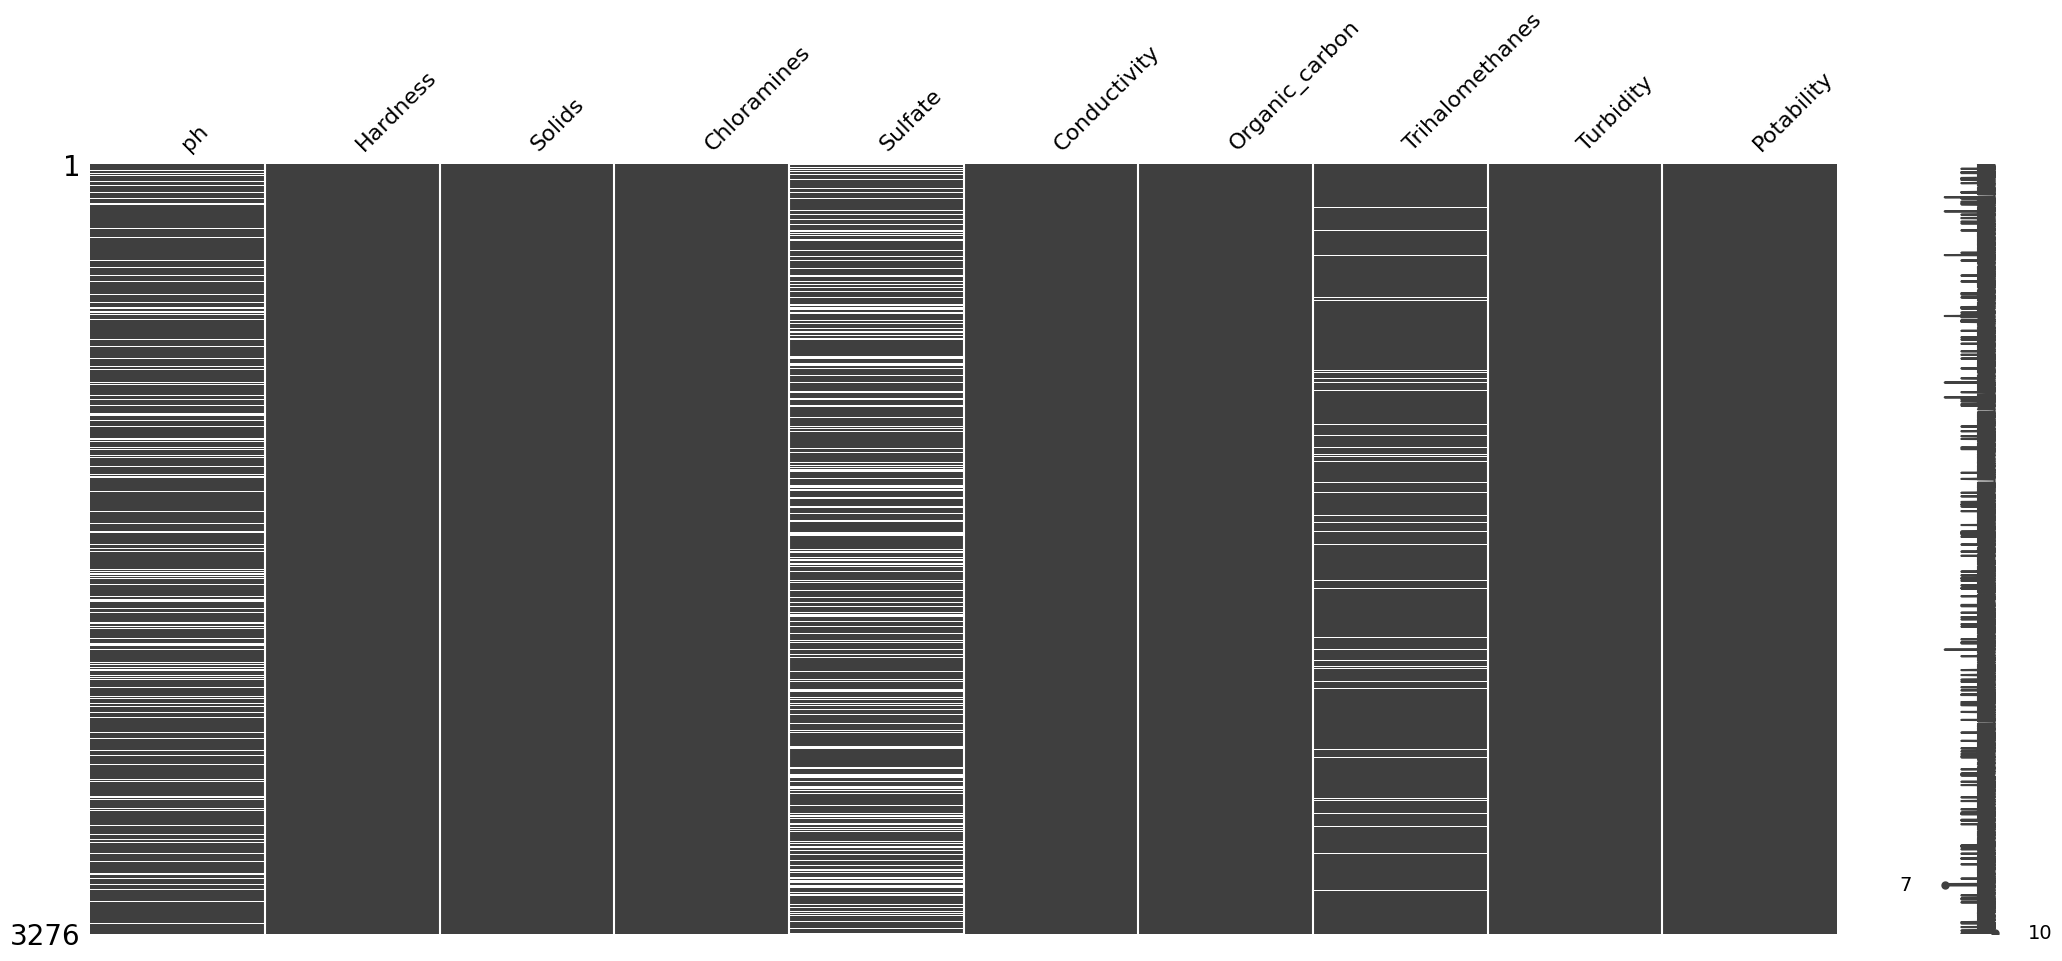

In [ ]:
# Missing Values Visualization
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df)
plt.show()

ระดับ pH ของน้ำเป็นการวัดความเป็นกรดหรือด่างของน้ำ ซึ่งเป็นสิ่งสำคัญในการกำหนดว่าน้ำนั้นเป็นน้ำแข็ง (hard water) หรือน้ำอ่อน (soft water) การจำแนกประเภทนี้สำคัญเพราะมันมีผลต่อความเหมาะสมของน้ำสำหรับการใช้งานต่างๆ รวมถึงการดื่ม ซึ่งเรียกว่า "น้ำที่สามารถดื่มได้" หรือ "potable water"

นี่คือคำอธิบายที่ละเอียดยิ่งขึ้นของสิ่งที่คุณได้กล่าวถึง:

น้ำเป็นกรด: น้ำที่มีระดับ pH ต่ำกว่ามักจะเป็นกรด มาตราส่วน pH มีตั้งแต่ 0 ถึง 14 โดยที่ 7 เป็นกลาง ค่าต่ำกว่า 7 บ่งชี้ถึงความเป็นกรด และค่าที่สูงกว่า 7 บ่งชี้ถึงความเป็นด่าง

น้ำอ่อน: โดยทั่วไปมีระดับ pH ตั้งแต่ 6 ถึง 7 และมีแร่ธาตุเช่นแคลเซียมและแมกนีเซียมน้อยกว่า น้ำอ่อนมักจะถูกพิจารณาว่าเข้ากันได้ดีกับสบู่ สร้างฟองได้ง่ายขึ้น และมักจะอ่อนโยนต่อเครื่องใช้ไฟฟ้าและระบบท่อน้ำ

น้ำแข็ง: ในทางกลับกัน มีระดับ pH ประมาณ 7 ถึง 8 มีระดับแร่ธาตุสูงขึ้น โดยเฉพาะแคลเซียมและแมกนีเซียม ซึ่งอาจนำไปสู่การสะสมของตะกรันในท่อและเครื่องใช้ไฟฟ้า แม้ว่าน้ำแข็งมักจะถูกพิจารณาว่ามีประโยชน์ต่อการดื่มเพราะมีแร่ธาตุที่มันให้มา

บทความที่คุณอ้างอิงแนะนำว่าน้ำที่มีระดับ pH ต่ำมักจะเป็นน้ำอ่อนเนื่องจากมีแร่ธาตุในน้ำแข็งลดความเป็นกรดลง

เพื่อจัดการกับค่า pH ที่ขาดหายไปในชุดข้อมูล คุณกำลังพิจารณาวิธีที่เกี่ยวข้องกับการจำแนกข้อมูลเป็นสี่ประเภทตามสองเกณฑ์: ความสามารถในการดื่ม (ไม่ว่าน้ำนั้นปลอดภัยสำหรับการดื่มหรือไม่) และความแข็งของน้ำ (วัดโดยปริมาณแคลเซียมและแมกนีเซียมในน้ำ โดยใช้ 150 เป็นเกณฑ์ระหว่างน้ำอ่อนและน้ำแข็ง) การจำแนกประเภทคือ:

ไม่สามารถดื่มได้และความแข็ง ≤ 150 (น้ำอ่อน)
ไม่สามารถดื่มได้และความแข็ง > 150 (น้ำแข็ง)
สามารถดื่มได้และความแข็ง ≤ 150 (น้ำอ่อน)
สามารถดื่มได้และความแข็ง > 150 (น้ำแข็ง)
สำหรับแต่ละการจำแนกประเภท คุณจะคำนวณค่าเฉลี่ยระดับ pH จากข้อมูลที่มีอยู่ จากนั้นคุณจะนำค่าเฉลี่ยเหล่านี้มาใส่ในช่องที่ขาดหายของระดับ pH ตามการจำแนกประเภทของพวกเขา วิธีการนี้สมมติว่าระดับ pH มีความสัมพันธ์กับทั้งความสามารถในการดื่มและความแข็งของน้ำ และว่าประเภทของน้ำที่คล้ายกันจะมีระดับ pH ที่คล้ายกัน

**Missing Values : PH Level**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

print('Conditonal Statements to fill in the Missing Values of PH Value Column')

print("\n")
print('if Potability = 0 and Hardness <= 150')
condition_1_mean_ph = df[(df['Potability'] == 0) & (df['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_1_mean_ph)))

print("\n")
print('if Potability = 0 and Hardness > 150')
condition_2_mean_ph = df[(df['Potability'] == 0) & (df['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_2_mean_ph)))


print("\n")
print('if Potability = 1 and Hardness <= 150')
condition_3_mean_ph = df[(df['Potability'] == 1) & (df['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_3_mean_ph)))

print("\n")
print('if Potability = 1 and Hardness > 150')
condition_4_mean_ph = df[(df['Potability'] == 1) & (df['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_4_mean_ph)))

Conditonal Statements to fill in the Missing Values of PH Value Column


if Potability = 0 and Hardness <= 150
PH VALUE : 6.7220


if Potability = 0 and Hardness > 150
PH VALUE : 7.1125


if Potability = 1 and Hardness <= 150
PH VALUE : 7.0982


if Potability = 1 and Hardness > 150
PH VALUE : 7.0714


In [ ]:
# Replace missing value for PH
for x in range(0, len(df)) :
    if (pd.isnull(df['ph'][x]) == True) :
        if ((df['Potability'][x] == 0) & (df['Hardness'][x] <= 150)) : df['ph'][x] = condition_1_mean_ph
        elif ((df['Potability'][x] == 0) & (df['Hardness'][x] > 150)) : df['ph'][x] = condition_2_mean_ph
        elif ((df['Potability'][x] == 1) & (df['Hardness'][x] <= 150)) : df['ph'][x] = condition_3_mean_ph
        elif ((df['Potability'][x] == 1) & (df['Hardness'][x] > 150)) : df['ph'][x] = condition_4_mean_ph

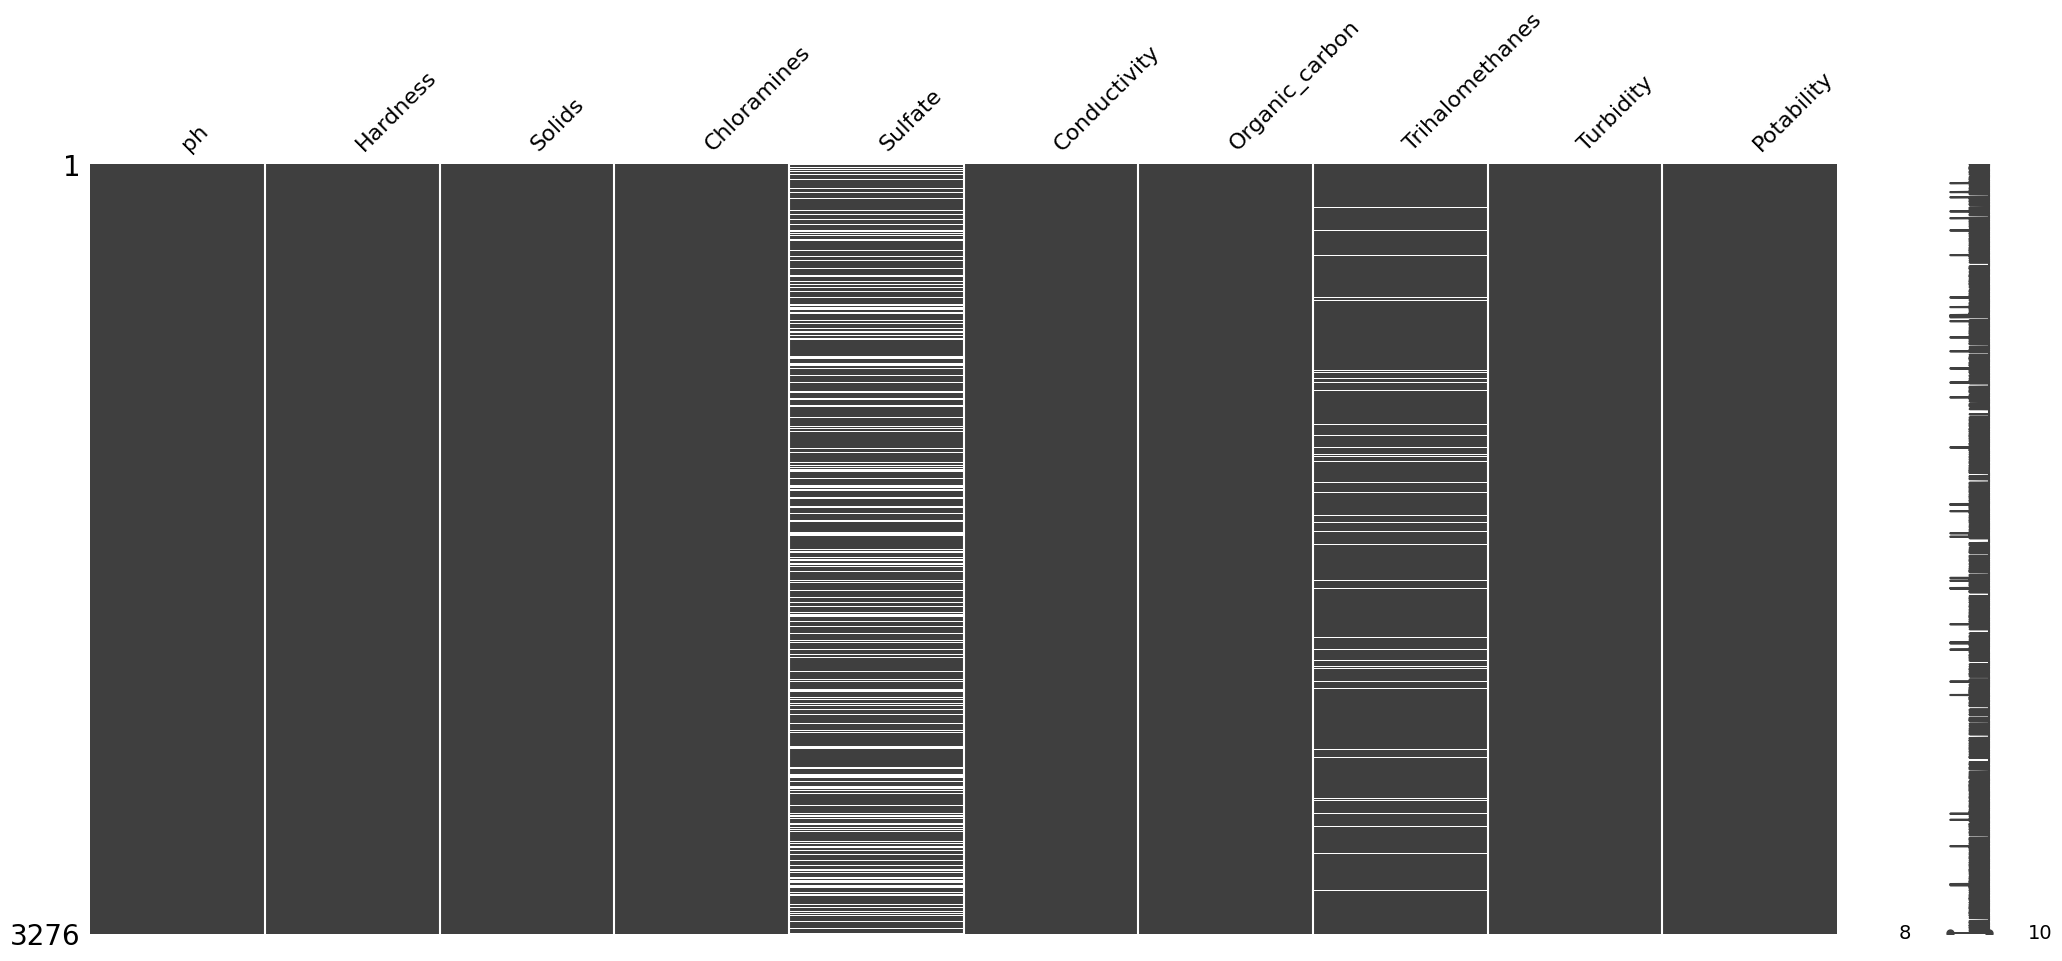

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df)
plt.show()

**Missing Values : Sulfate**

Solution :
get the mean of the Sulfate column of both the Not Potable and Potable Rows and impute them to their respective rows.

In [ ]:
print('Conditonal Statements to fill in the Missing Values of Sulfate Column')

print("\n")
print('if Potability = 0')
condition_1_mean_sulfate = df[(df['Potability'] == 0)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_1_mean_sulfate)))

print("\n")
print('if Potability = 1')
condition_2_mean_sulfate = df[(df['Potability'] == 1)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_2_mean_sulfate)))

Conditonal Statements to fill in the Missing Values of Sulfate Column


if Potability = 0
Sulfate : 334.5643


if Potability = 1
Sulfate : 332.5670


In [ ]:
# Replace missing value for Sulfate
for x in range(0, len(df)) :
    if (pd.isnull(df['Sulfate'][x]) == True) :
        if (df['Potability'][x] == 0) : df['Sulfate'][x] = condition_1_mean_sulfate
        else : df['Sulfate'][x] = condition_2_mean_sulfate

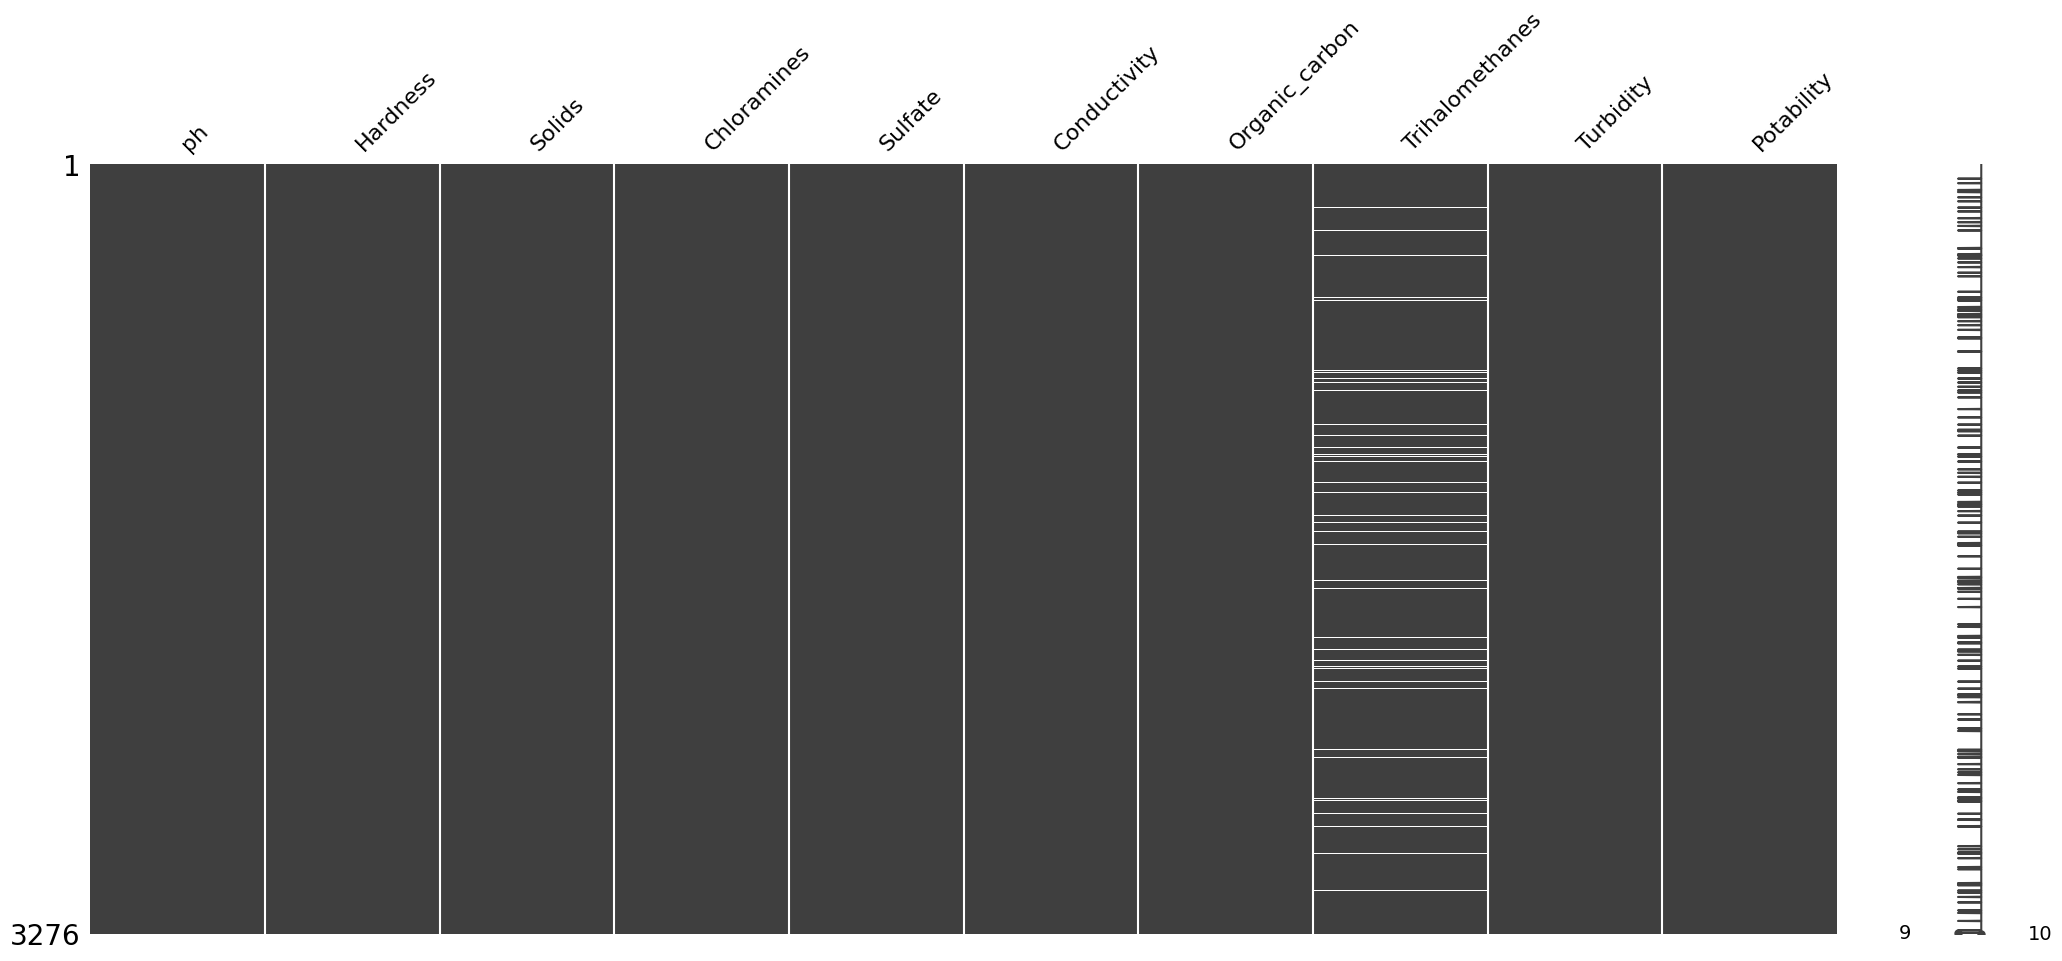

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df)
plt.show()

**Missing Values : Trihalomethanes**

Solution :
get the mean of the Trihalomethanes column from both the Not Potable and Potable Rows and impute them to the rows with missing values.

The reason why we will not provide a different value to impute for Not potable and Potable Rows is because their mean is both 66 Trihalomethanes.

In [ ]:
print("Mean of Trihalomethanes : {:.4f}".format(float(df['Trihalomethanes'].mean())))

df['Trihalomethanes'].fillna(value = df['Trihalomethanes'].mean() , inplace = True)

Mean of Trihalomethanes : 66.3963


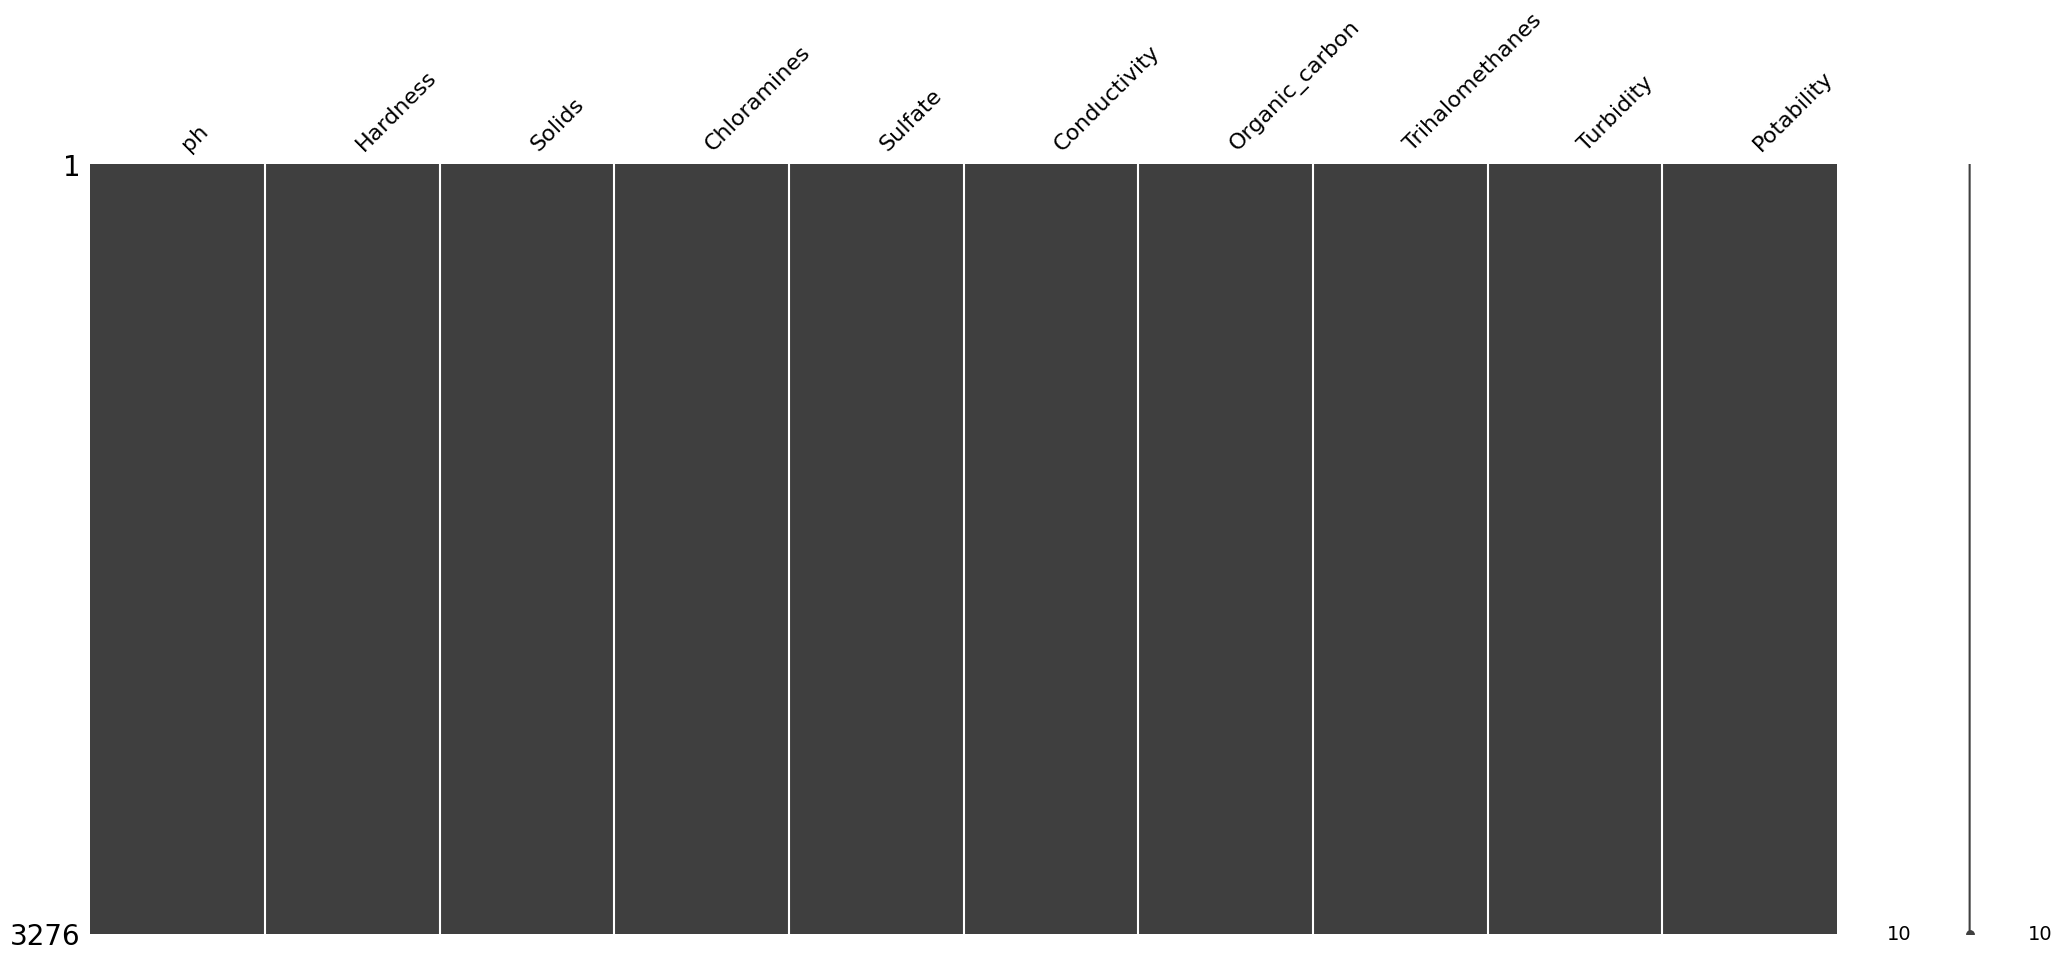

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
# df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Water Quality/Water_Quality_nonMissing.csv')

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame and it has been defined previously.

# Create a list of the columns you want to create box plots for
columns = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]

# Create subplots with 3 columns and as many rows as needed to accommodate the plots
rows = len(columns) // 3 + (1 if len(columns) % 3 > 0 else 0)
fig = make_subplots(rows=rows, cols=3, subplot_titles=columns)

# Create box plots for each column
for i, column in enumerate(columns):
    row = i // 3 + 1
    col = i % 3 + 1
    box = px.box(df, y=column, template="plotly_dark") # 'y' should be used here with the column name
    trace = box["data"][0]
    fig.add_trace(trace, row=row, col=col)

# Update layout to adjust for the number of rows and desired height
total_height = 2000 # You can change this to your desired height in pixels
fig.update_layout(height=total_height, title_text='Outliers in Various Fields', showlegend=False)

# Update layout
# fig.update_layout(title_text='Outliers in Various Fields', showlegend=False)

# Show the figure
fig.show()


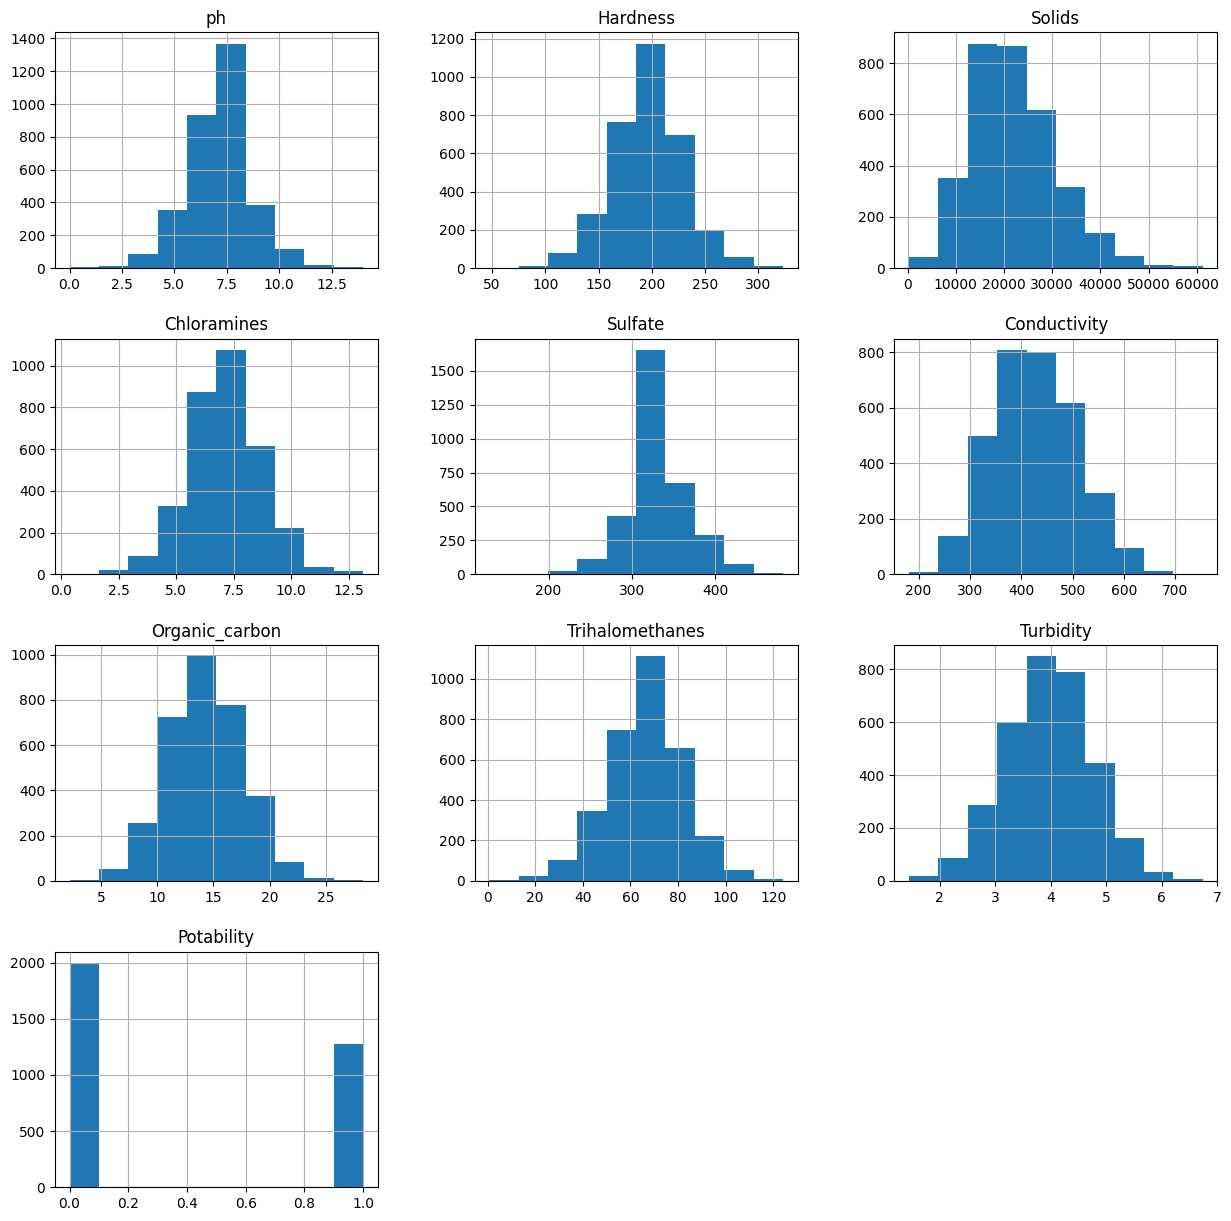

In [ ]:
df.hist(figsize=(15,15))
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame and it has been defined previously.

# Define a function to calculate IQR and determine outliers
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply the function to each column and print the outliers
outliers_dict = {}
for column in df.columns:
    outliers = find_outliers(df, column)
    outliers_dict[column] = outliers
    print(f"Outliers for {column}:\n{outliers}\n")


Outliers for ph:
             ph    Hardness        Solids  Chloramines     Sulfate  \
1      3.716080  129.422921  18630.057858     6.635246  334.564290   
9     11.180284  227.231469  25484.508491     9.077200  404.041635   
26     3.445062  207.926260  33424.768678     8.782147  384.007006   
32    10.433291  117.791230  22326.892046     8.161505  307.707509   
36     3.641630  183.908722  24752.072460     5.538314  286.059556   
...         ...         ...           ...          ...         ...   
3233  10.485604  136.577381  32872.380566     8.399435  276.921835   
3246  10.667364  173.381945  28912.202201     7.071294  276.634391   
3249  10.808157  198.596751  29614.348790     5.782418  304.622061   
3261   3.629922  244.187392  24856.633209     6.618071  366.967873   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
1       592.885359       15.180013        56.329076   4.500656   

In [ ]:
from scipy.stats import zscore

# Assuming 'df' is your DataFrame and it has been defined previously.

# Calculate Z-scores
df_zscore = df.apply(zscore)

# Find outliers
# Usually, a threshold of 3 or -3 is used, but it can be adjusted.
threshold = 3
outliers = (df_zscore.abs() > threshold).any(axis=1)
df_outliers = df[outliers]

print(df_outliers)


             ph    Hardness        Solids  Chloramines     Sulfate  \
37     5.618064  304.235912  17281.975168     6.101084  334.564290   
61     6.391354  213.017830  20965.478309     5.375560  327.650543   
66     5.058109  238.569380  34873.934523     8.983276  374.433505   
80     1.844538  233.764343  28689.595778     7.724432  334.564290   
88    10.155440  300.292476  12652.362979     6.655126  398.647786   
...         ...         ...           ...          ...         ...   
3184   8.285072  151.573778  14402.726696     9.050080  303.081838   
3190   9.293622  193.061723  50166.533323     6.301884  332.566990   
3221   4.034063  303.702627  33219.074545     4.425559  332.566990   
3226   7.870853  210.627825  51731.820553     6.190963  332.566990   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
37      399.471566       12.265002        81.588992   2.896547           0  
61   

In [ ]:
from scipy import stats
import pandas as pd
import numpy as np

# Sample data creation for demonstration:
np.random.seed(42)
df = pd.DataFrame({
    "ph": np.random.normal(7, 2, 100),
    "Hardness": np.random.normal(100, 15, 100),
    "Solids": np.random.normal(10000, 1200, 100),
    "Chloramines": np.random.normal(7, 1, 100),
    "Sulfate": np.random.normal(300, 25, 100),
    "Conductivity": np.random.normal(400, 20, 100),
    "Organic_carbon": np.random.normal(15, 1, 100),
    "Trihalomethanes": np.random.normal(80, 10, 100),
    "Turbidity": np.random.normal(4, 0.5, 100)
})

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df))

# Define a threshold for identifying outliers
threshold = 3

# Get indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Prepare a list of outlier values for each variable
outliers = []
for i in range(len(outlier_indices[0])):
    outliers.append((df.columns[outlier_indices[1][i]], df.iloc[outlier_indices[0][i], outlier_indices[1][i]]))

outliers


[('Solids', 14623.277788785665), ('Solids', 6110.479191917113)]

# ***จัดการ Outliers***

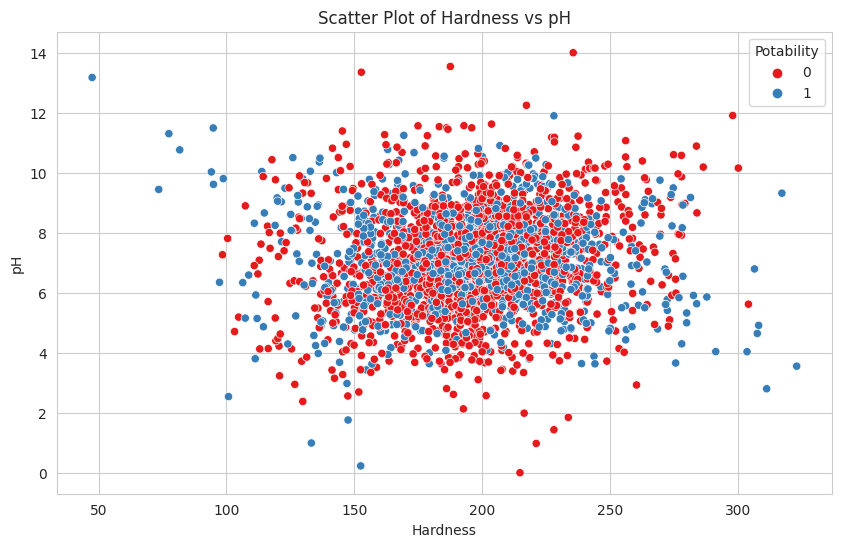

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/00.WaterQuality/water_potability.csv'

# โหลดไฟล์ CSV เป็น DataFrame
df = pd.read_csv(file_path)

# Set the style of the seaborn plot
sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hardness', y='ph', hue='Potability', data=df, palette='Set1')

# Add title and labels to the plot
plt.title('Scatter Plot of Hardness vs pH')
plt.xlabel('Hardness')
plt.ylabel('pH')

# Display the plot
plt.show()